Question 3 

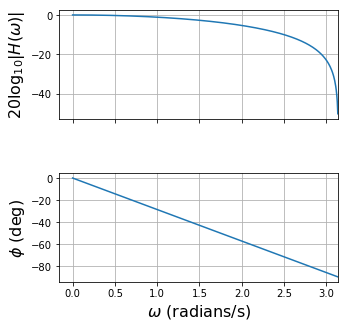

In [1]:
%matplotlib inline
from __future__ import division
from scipy import signal 
import numpy as np
import matplotlib.pyplot as plt

#this here only adjust the aspect of the plots
fig, axs = plt.subplots(2,1,sharex=True)
plt.subplots_adjust( hspace = .5 )
fig.set_size_inches((5,5))

ax=axs[0]
w,h=signal.freqz([1/2., 1/2.],1) #we compute impulse response for the filter above (coefficients)
ax.plot(w,20*np.log10(abs(h))) #we plot the logarithmic response as a function of the frequency in radians
ax.set_ylabel(r"$20 \log_{10} |H(\omega)| $",fontsize=16)
ax.grid()

ax=axs[1]
ax.plot(w,np.angle(h)/np.pi*180) #we compute the phase of the response in degrees
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=16)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.set_xlim(xmax = np.pi)
ax.grid()

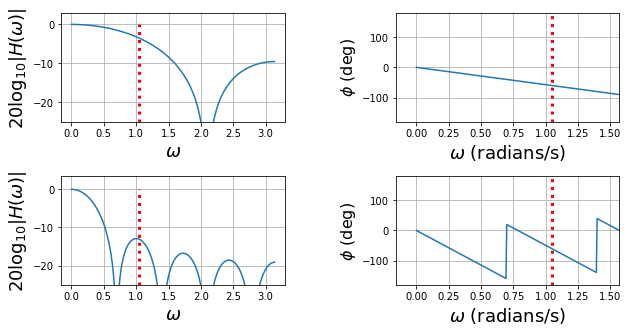

In [19]:
from matplotlib import gridspec

fig=plt.figure()
fig.set_size_inches((10,5))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

ax = fig.add_subplot(plt.subplot(gs[0,0]))

ma_length = 3 # moving average filter length
w,h=signal.freqz(np.ones(ma_length)/ma_length,1)
ax.plot(w,20*np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r"$\omega$",fontsize=18)
ax.vlines(np.pi/3,-25,0,linestyles=':',color='r',lw=3.)
ax.set_ylim(ymin=-25)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(w,np.angle(h)/np.pi*180)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.set_xlim(xmax = np.pi/1/2)
ax.set_ylim(ymin=-180,ymax=180)
ax.vlines(np.pi/3,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

ma_length = 9 # moving average filter length
w,h=signal.freqz(np.ones(ma_length)/ma_length,1)
ax = fig.add_subplot(plt.subplot(gs[1,0]))
ax.plot(w,20*np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r"$\omega$",fontsize=18)
ax.vlines(np.pi/3,-25,0,linestyles=':',color='r',lw=3.)
ax.set_ylim(ymin=-25)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax = fig.add_subplot(plt.subplot(gs[1,1]))
ax.plot(w,np.angle(h)/np.pi*180)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.set_xlim(xmax = np.pi/1/2)
ax.set_ylim(ymin=-180,ymax=180)
ax.vlines(np.pi/3,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

So, Output signal with 3vs9 average filter

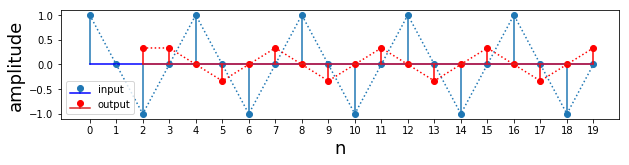

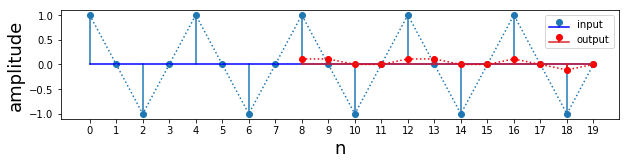

In [14]:
fig=plt.figure()
fig.set_size_inches((10,5))

ax = fig.add_subplot(plt.subplot(gs[1,:]))
Ns=20
n= np.arange(Ns)
x = np.cos(np.arange(Ns)*np.pi/1/2.)  #building the signal with a frequency of 2pi/1
ma_length=3
y= signal.lfilter(np.ones(ma_length)/ma_length,1,x)  #applying the filter that uses 8 coefficients that are equal to 1

ax.stem(n,x,label='input',basefmt='b-')
ax.plot(n,x,':')
ax.stem(n[ma_length-1:],y[:-ma_length+1],markerfmt='ro',linefmt='r-',label='output')
ax.plot(n[ma_length-1:],y[:-ma_length+1],'r:')
ax.set_xlim(xmin=-1.1)
ax.set_ylim(ymin=-1.1,ymax=1.1)
ax.set_xlabel("n",fontsize=18)
ax.set_xticks(n)
ax.legend(loc=0)
ax.set_ylabel("amplitude",fontsize=18);

fig=plt.figure()
fig.set_size_inches((10,5))

ax = fig.add_subplot(plt.subplot(gs[1,:]))
Ns=20
n= np.arange(Ns)
x = np.cos(np.arange(Ns)*np.pi/1/2.)  #building the signal with a frequency of 2pi/1
ma_length=9
y= signal.lfilter(np.ones(ma_length)/ma_length,1,x)  #applying the filter that uses 8 coefficients that are equal to 1

ax.stem(n,x,label='input',basefmt='b-')
ax.plot(n,x,':')
ax.stem(n[ma_length-1:],y[:-ma_length+1],markerfmt='ro',linefmt='r-',label='output')
ax.plot(n[ma_length-1:],y[:-ma_length+1],'r:')
ax.set_xlim(xmin=-1.1)
ax.set_ylim(ymin=-1.1,ymax=1.1)
ax.set_xlabel("n",fontsize=18)
ax.set_xticks(n)
ax.legend(loc=0)
ax.set_ylabel("amplitude",fontsize=18);

When we Compare our 3vs9 average filter it seems like they have different output starting point and in the first 
On x-axis one output started at 2(which is 3 if counted from zero) and secound one started at 8.
Their amplitude also changed 
The first one (which is 3 ) has a amplitude of approx. 0.4 compare with the amplitude approx 0.2 of 9.
Becasue the frequency of the input signal is pi/1/2 and its period is T=4 samples, the input signal repeat every 
four samples.